# Машинное обучение, ШАД
## Лабораторная работа 3. Линейные модели классификации и регрессии, валидация моделей.


**Правила:**

* Выполненную работу нужно отправить в соответствующее задание в личном кабинете
* Дедлайн **2 октября 15:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Для сдачи задания нужно загрузить **ноутбук в формате `ipynb`** в ЛМС.
* Выполнять задание необходимо полностью самостоятельно.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Присылайте понятный и читаемый код. Если код не будет понятен проверяющему, оценка может быть снижена.
* Код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * прикрепив ее в ЛМС в форматах `pdf`, `png` или `jpg` *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $\LaTeX$ в markdown-ячейках или в отдельном `pdf`-файле.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 1 балл;
* Задача 2 &mdash; 1 балл;
* Задача 3 &mdash; 1 балл;
* Задача 4 &mdash; 1 балл;
* Задача 5 &mdash; 5 баллов.

----

---
### Задача 1. 

1. Пусть $X_1,...,X_n$ &mdash; выборка из гамма-распределения с плотностью $p_\theta(x) = \frac{\theta^\beta}{\Gamma(\beta)} x^{\beta-1} e^{-\theta x}$, где $\theta>0, \beta>0, x>0$, причем $\beta$ известно. Найдите оценку максимального правдоподобия параметра $\theta$.

2. Пусть $X_1,...,X_n$ &mdash; выборка из пуассоновского распределения, для которого $\mathsf{P}_\theta(X_i = k) = \frac{\theta^k}{k!}e^{-\theta}$, где $\theta>0, k \in \mathbb{Z}_+ = \{0, 1, 2, ...\}$. Найдите оценку максимального правдоподобия параметра $\theta$.

1. $L_x(\theta) = \prod\limits_{i = 1}^np_{\theta}(x_i) = \prod\limits_{i = 1}^n\frac{\theta^{\beta}}{\Gamma(\beta)}x_i^{\beta-1}e^{-\theta x_i} = \frac{\theta^{n\beta}}{(\Gamma(\beta))^n}\exp(-\theta\sum\limits_{i = 1}^nx_i)\prod\limits_{i = 1}^nx_i^{\beta-1}$ \
$l_x(\theta) = n\beta \ln{\theta} - n\ln{\Gamma(\beta)} -\theta\sum\limits_{i = 1}^nx_i + (\beta - 1) \sum\limits_{i = 1}^n \ln{x_i}$ \
$\dfrac{\partial l_x(\theta)}{\partial \theta} = \dfrac {n\beta} \theta - \sum\limits_{i = 1}^nx_i = 0$ \
$\widehat{\theta} = \dfrac{n\beta}{\sum\limits_{i = 1}^nx_i} = \dfrac \beta {\overline{x}}$


2. $L_x(\theta) = \prod\limits_{i = 1}^np_{\theta}(x_i) = \prod\limits_{i = 1}^n\frac{\theta^{x_i}}{x_i!}e^{-\theta}$ \
$l_x(\theta) = \sum\limits_{i = 1}^nx_i\ln{\theta}-\sum\limits_{i = 1}^n\ln{x_i!} - \theta n$ \
$\dfrac{\partial l_x(\theta)}{\partial \theta} = \dfrac 1{\theta}\sum\limits_{i = 1}^nx_i - n = 0$ \
$\widehat{\theta} = \dfrac{\sum\limits_{i = 1}^nx_i}n = \overline{x}$

---
### Задача 2.

Пусть $\ell_Y(\theta)$ &mdash; логарифмическая функция правдоподобия в модели логистической регрессии, задачу максимизации которой мы рассматривали на лекции. Добавим к ней $L_2$-регуляризатор и будем рассматривать задачу
$$F(\theta) = -\ell_Y(\theta) + \lambda \|\theta\|^2  \longrightarrow \min_{\theta \in \mathbb{R}^d},$$
где $\lambda > 0$ &mdash; коэффициент регуляризации.

1. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

2. Покажите, что $F(\theta)$ &mdash; выпуклая функция по $\theta$ и, как следствие, имеет единственный экстремум, являющийся глобальным минимумом. *Указание*. Посчитайте гессиан (матрицу вторых производных) и покажите, что она положительно определена.

3. Опишите, как может вести себя решение при отсутствии регуляризации, то есть при $\lambda = 0$

$L_y(\theta) = \prod\limits_{i=1}^n\sigma(x_i^T\theta)^{y_i}(1 - \sigma(x_i^T\theta))^{1 - y_i}$ \
$\ell_y(\theta) = \sum\limits_{i=1}^n[y_i\ln{\sigma(x_i^T\theta)} + (1 - y_i)\ln{(1 - \sigma(x_i^T\theta))}]$ \
$\nabla_{\theta}\ell_Y = \sum\limits_{i = 1}^nx_i(y_i - \sigma(x_i^T\theta))$ \
$\nabla_{\theta}F = -\nabla_{\theta}\ell_Y + 2\lambda\theta = -\sum\limits_{i = 1}^nx_i(y_i - \sigma(x_i^T\theta)) + 2\lambda\theta$ 
1. **GD:** $\ \theta_{t+1} = \theta_t - \eta\nabla_{\theta}F(\theta_t) = \theta_t + \eta[\sum\limits_{i = 1}^nx_i(y_i - \sigma(x_i^T\theta_t))- 2\lambda\theta_t] $ \
**SGD:** $\ \theta_{t+1} = \theta_t - \eta\dfrac nk\nabla_{\theta}F_{stoch}(\theta_t) = \theta_t + \eta\dfrac nk[\sum\limits_{i \in I}x_i(y_i - \sigma(x_i^T\theta_t))- 2\lambda\theta_t]$, где $I = \{i_1, i_2, \dots, i_k\} \sim U\{1, 2, \dots, n\}$
2. $\nabla_{\theta}^2F = -\dfrac{\partial}{\partial\theta}\sum\limits_{i = 1}^nx_i(y_i - \sigma(x_i^T\theta)) + 2\lambda I_d = \sum\limits_{i = 1}^nx_i\sigma(x_i^T\theta)(1 - \sigma(x_i^T\theta))x_i^T + 2\lambda I_d  \succ 0,\quad $\
$т.к.\ \forall h \ne 0 \quad h^T(\nabla_{\theta}^2F) h = h^T[\sum\limits_{i = 1}^nx_i\sigma(x_i^T\theta)(1 - \sigma(x_i^T\theta))x_i^T + 2\lambda I_d]h=$\
$ = \sum\limits_{i = 1}^nh^Tx_i\sigma(x_i^T\theta)(1 - \sigma(x_i^T\theta))x_i^Th + 2\lambda h^TI_dh = \sum\limits_{i = 1}^n\sigma(x_i^T\theta)(1 - \sigma(x_i^T\theta)) \langle h^Tx_i, h^Tx_i \rangle + 2\lambda \langle h, h \rangle > 0$ \
$\Rightarrow \ F(\theta) - строго\ выпукла$
3. При отсутствии регуляризации $\theta$ будет более отдалена от $0$, вследствие чего предсказываемые вероятности отдалятся от $\frac12$, и модель будет увереннее классифицировать объекты. Однако это не значит, что точность станет лучше. Напротив, без регуляризации почти всегда хуже.

---
### Задача 3.

Рассмотрим линейную регрессию $y(x) = x^T \theta$, причем для оценки $\theta$ будем рассматривать функцию потерь Хьюбера
$$R(x) = \frac{x^2}{2} I\{|x| \leqslant c\} + c\left(|x| - \frac{c}{2}\right)I\{|x| > c\}.$$

Тем самым задача оптимизации имеет вид
$$\sum_{i=1}^n R(Y_i - x_i^T \theta) \longrightarrow \min_{\theta \in \mathbb{R}^d}.$$

1. Нарисуйте график $R(x)$. В чем польза выбора такой функции потерь?

2. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

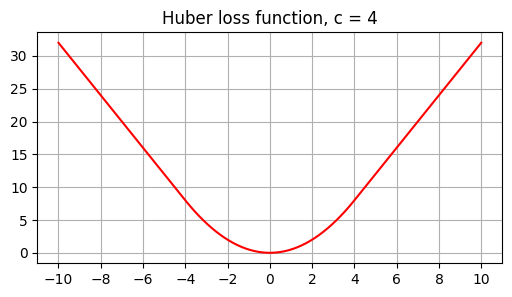

In [1]:
import numpy as np
from matplotlib import pyplot as plt

fig, axes = plt.subplots(figsize=(6, 3))
def f(x, c = 4):
    return x ** 2 / 2 * (abs(x) <= c) + c * (abs(x) - c/2) * (abs(x) > c)

x = np.linspace(-10, 10, 100)
plt.plot(x, f(x), color='red')
plt.xticks(np.arange(-10, 12, 2))
plt.title('Huber loss function, c = 4')
plt.grid()
plt.show()

1. Такая функция потерь выгодна тем, что, будучи непрерывной, она является квадратичной в радиусе $c$ от $0$, и линейной на остальном пространстве. Таким образом, ошибки в пределах радиуса будут давать вклад гораздо сильнее, чем ошибки вне его, а потому будет снижена роль выбросов.
2. $R(x) = \frac{x^2}{2} I\{|x| \leqslant c\} + c\left(|x| - \frac{c}{2}\right)I\{|x| > c\}$ \
$\nabla_x R(x) = x\cdot I\{|x| \leqslant c\} + c\cdot sign(x) I\{|x| > c\}$ \
$F(\theta) = \sum\limits_{i=1}^n R(y_i + x_i^T \theta)$ \
$\nabla_{\theta} F(\theta) = \sum\limits_{i=1}^n \nabla_\theta R(y_i - x_i^T \theta) = \sum\limits_{i = 1}^n x_i[ (y_i - x_i^T \theta)\cdot I\{|y_i - x_i^T \theta| \leqslant c\} + c\cdot sign(y_i - x_i^T \theta) I\{|y_i - x_i^T \theta| > c\}]$\
**GD:** $\ \theta_{t+1} = \theta_t - \eta\nabla_{\theta}F(\theta_t) = \theta_t - \eta\sum\limits_{i = 1}^n x_i[ (y_i - x_i^T \theta_t)\cdot I\{|y_i - x_i^T \theta_t| \leqslant c\} + c\cdot sign(y_i - x_i^T \theta_t) I\{|y_i - x_i^T \theta_t| > c\}] $ \
**SGD:** $\ \theta_{t+1} = \theta_t - \eta\dfrac nk\nabla_{\theta_t}F_{stoch}(\theta_t) = \theta_t - \eta\dfrac nk\sum_\limits{i \in I} x_i[ (y_i - x_i^T \theta_t)\cdot I\{|y_i - x_i^T \theta_t| \leqslant c\} + c\cdot sign(y_i - x_i^T \theta_t) I\{|y_i - x_i^T \theta_t| > c\}]$, где $I = \{i_1, i_2, \dots, i_k\} \sim U\{1, 2, \dots, n\}$

---
### Задача 4.

В предыдущем домашнем задании вы подробно познакомились с линейными моделями, выяснили о необходимости обработки непрерывных и категориальных признаков, узнали о способах подбора гиперпараметров. Порассуждайте над следующими вопросами.

**1.** Какие побочные эффекты могут возникунуть при стандартизации (нормализации) признаков с помощью `StandardScaler`, `MinMaxScaler`? Что с этим можно сделать?

*И та, и другая модель чувствительны к выбросам, поэтому результат может сильно отличаться от желаемого.  
Заранее избавившись от выбросов, эту проблему можно решить.*

**2.** Рассмотрим пример с первого занятия про модель потребления мороженого от температуры:
$$ic=\theta_1 + \theta_2 t.$$
Предположим, что нам также известен еще один признак, отвечающий за год. Обозначим его за $y$. Пусть $y \in \{1, 2, 3\}$. Попробуем учесть влияние года двумя разными способами:
* Модель $ic = \theta_1 + \theta_2 t+ \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{y=1\}$, $y_2 = I\{y=2\}$.
* Для каждого года рассматривается своя линейная зависимость $ic=\theta_1+\theta_2 t$.
  
Поясните, в чем различие этих двух подходов.

*Отличие первого подхода от второго в том, что зафиксирован линейный коэффициент $\theta_2$, одинаковый для всех годов.  
Первый подход позволяет моделировать общий тренд потребления мороженого для всех годов, а второй - различные тренды для каждого года, не ориентируясь на общий.  
В целом, второй способ предоставляет большую свободу.*

**3.** Визуализируйте совместные распределения вещественных признаков и целевой переменной для данных из предыдущего домашнего задания. Что можно сказать о зависимости таргета от признаков? Сделайте вывод о том, насколько хорошо построенные модели приближают истинные зависимости. 

*Я визуализовал совместные распределения для признаков, имевших наибольшие коэффициенты в модели. Некоторые действительно оказались более информативными чем в остальных случаях (отмечены голубым) , например, Total_Bsmt_SF и Gr_Liv_Area явственно показыввают линейную зависимость. Однако были среди них и те, которые совершенно не создавали осмысленной картины (отмечены красным).*  
*Так что построенные модели часто хорошо приближают истинные зависимости, но бывает и не особо.*

Полученные графики приложите к решению теоретического задания.

*Прилагаю:*


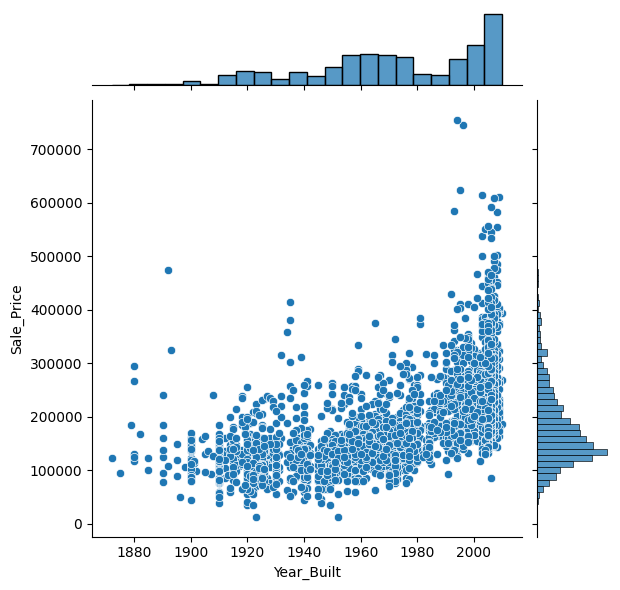

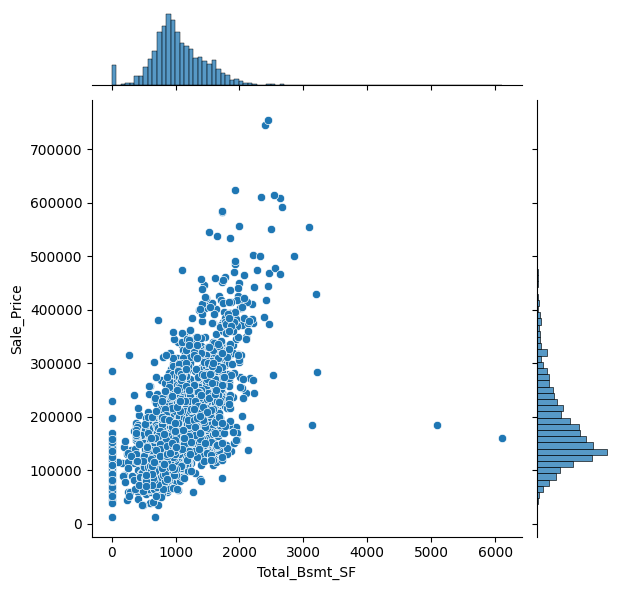

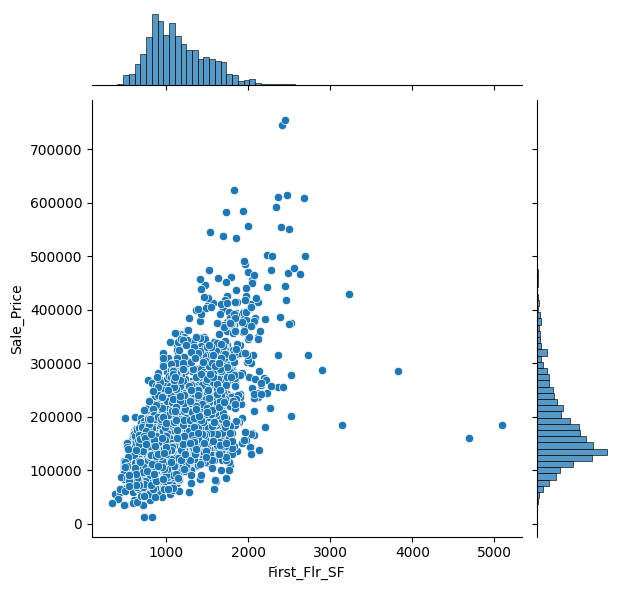

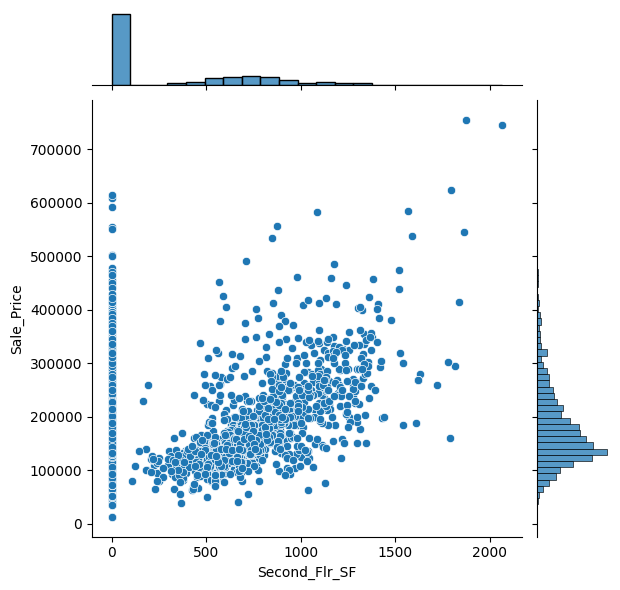

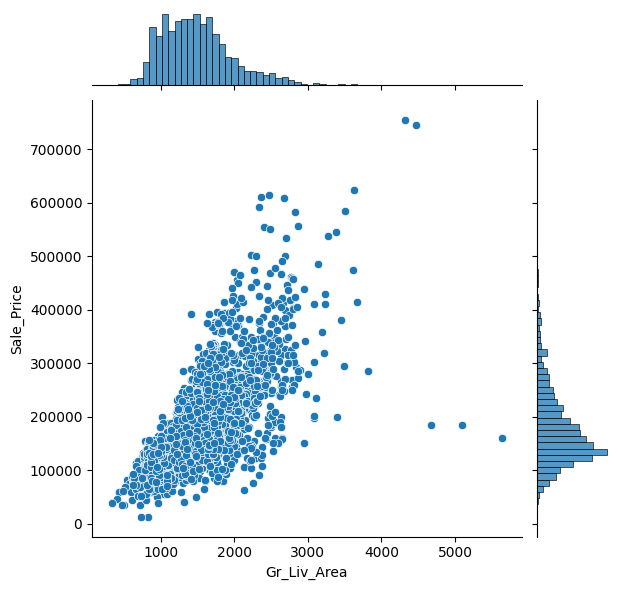

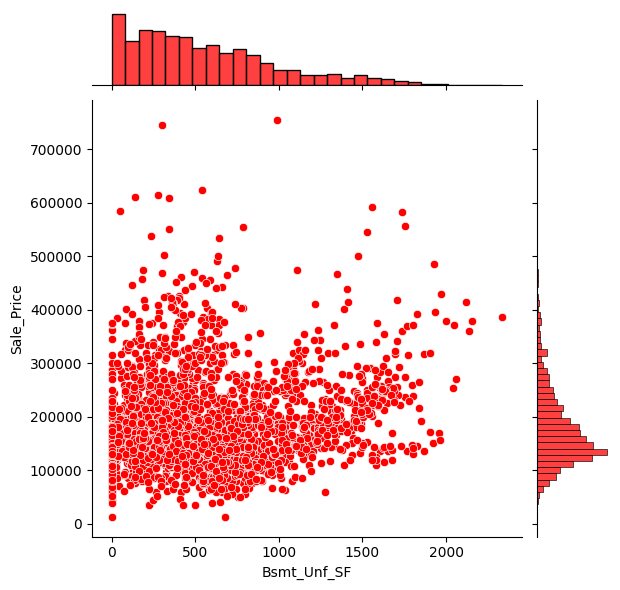

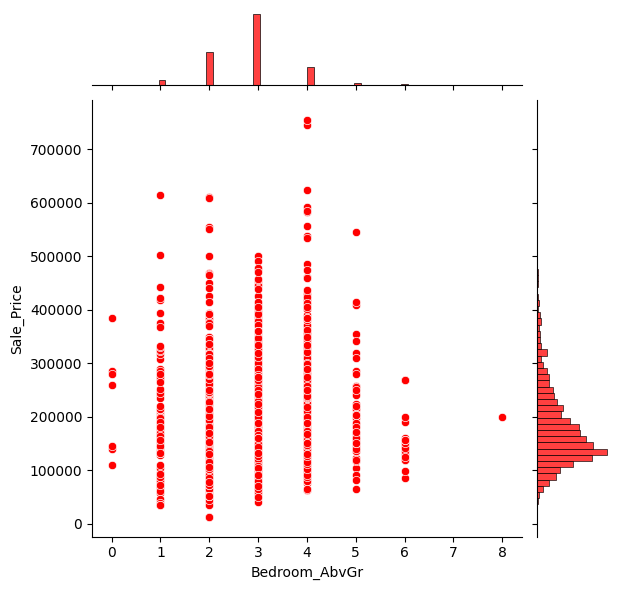

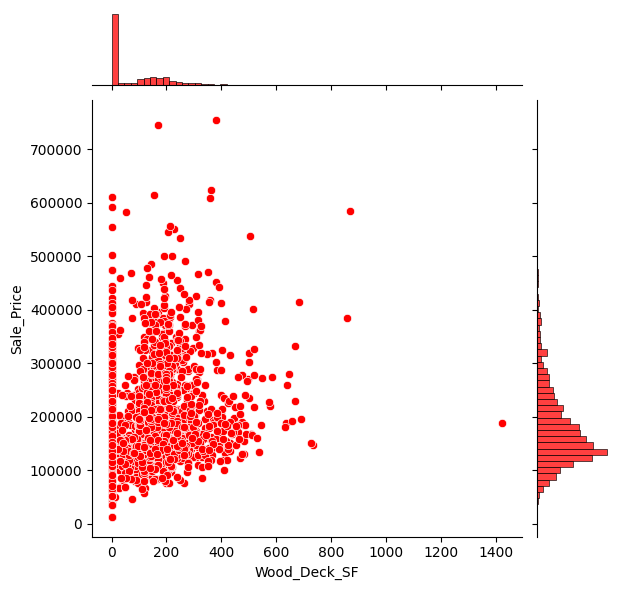

In [2]:
import pandas as pd
data = pd.read_csv('./data.csv')
continuous_columns = [key for key in data.keys() if data[key].dtype in ("int64", "float64")]
import seaborn as sns
interesting = [2,8,9,10,12]
not_interesting = [7,17,23]
for col in interesting:
    sns.jointplot(data=data, x=continuous_columns[col], y="Sale_Price")
for col in not_interesting:
    sns.jointplot(data=data, x=continuous_columns[col], y="Sale_Price", color='red')

---
### Задача 5.

Реализуйте логистическую регрессию с $L_2$ регуляризацией для поиска оценки параметров с помощью стохастического mini-batch градиентного спуска (SGD).

In [154]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, fbeta_score, roc_curve, precision_recall_curve, auc, 
    average_precision_score, make_scorer
)
from sklearn.model_selection import train_test_split,\
                                    GroupKFold,\
                                    LeaveOneOut,\
                                    ShuffleSplit,\
                                    KFold,\
                                    GroupShuffleSplit,\
                                    GridSearchCV,\
                                    cross_val_score

from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
import scipy

In [160]:
class LogisticRegression():
    '''
    Модель логистической регрессии. Имеет следующие гиперпараметры:

    :param alpha: параметр регуляризации. 
                  Если равно 0, то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param max_iter: ограничение на кол-во итераций
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    '''

    def __init__(self, alpha=0, lr=0.5, max_iter=1e5, batch_size=16,
                 fit_intercept=True):
        '''Создает модель и инициализирует параметры.'''

        self.alpha = alpha
        self.lr = lr
        self.max_iter = max_iter
        self.fit_intercept = fit_intercept
        self.batch_size = batch_size

    @staticmethod
    def _sigmoid(x):
        return scipy.special.expit(x)

    def _add_intercept(self, X):
        '''
        Добавляем свободный коэффициент к нашей модели. 
        Это происходит путем добавления вектора из 1 к исходной матрице.

        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентов
        '''

        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1.)
        X_copy[:, :-1] = X

        return X_copy

    def logistic_gradient(self, X, Y):
        return -X.T @ (Y - self._sigmoid(X @ self.weights)) + 2 * self.alpha * self.weights

    def fit(self, X, Y):
        '''
        Обучает модель логистической регресии с помощью SGD,
        пока не выполнится self.max_iter итераций.

        :param X: матрица признаков
        :param Y: истинные метки
        '''

        assert X.shape[0] == Y.shape[0]

        if self.fit_intercept:  # добавляем свободный коэфициент
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        self.weights = np.full(X_copy.shape[1], 0.)
        
        for i in range(round(self.max_iter)):
            sample = np.random.randint(len(X_copy), size=self.batch_size)
            self.weights -= self.lr / self.batch_size * self.logistic_gradient(X_copy[sample], Y[sample])
            

        self.coef_ = self.weights[:-1]  # коэффициенты модели
        self.intercept_ = self.weights[-1]  # свободный коэффициент
        # self.weights состоит из коэффициентов модели и свободного члена
        return self

    def predict(self, X):
        '''
        Применяет обученную модель к данным 
        и возвращает точечное предсказание (оценку класса).

        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.weights.shape[0]

        predictions = self._sigmoid(X_copy @ self.weights) >= 1/2

        return predictions

    def predict_proba(self, X):
        '''
        Применяет обученную модель к данным
        и возвращает предсказание вероятности классов 0 и 1.

        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.weights.shape[0]

        prob_predictions = np.c_[self._sigmoid(X_copy @ self.weights) >= 1/2, self._sigmoid(X_copy @ self.weights) < 1/2]

        return prob_predictions
        
    def get_params(self, deep=True):
        return {
            "alpha": self.alpha,
            "lr": self.lr, 
            "max_iter": self.max_iter,
            "fit_intercept": self.fit_intercept,
            "batch_size" : self.batch_size,
        }

        

Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [88]:
dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

['    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features were computed for each image,',
 '        resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '        10 is Radius SE, field 20 is Worst Radius.',
 '',
 '        - class:',
 '                - WDBC-Malignant',
 '                - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [89]:
X, Y = dataset['data'], dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [90]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

Теперь обучите модель логистической регрессии.

In [91]:
model = LogisticRegression()
model.fit(X_train_normalized, Y_train)
prediction = model.predict(X_test_normalized)

На занятии обсуждали, что в нашей постановке задачи при сравнении выиграет модель с меньшим FN, ведь каждая не обнаруженная опухоль может стоить человеческой жизни. Чем меньше ложно отрицательных срабатываний, тем выше Recall модели, а значит разумно взять Recall в качестве целевой метрики. 

Построить модель с Recall = 1 довольно просто (Как?), но в ней не будет большого смысла, т.к., например, для нашей задачи отправление на доп. обследование может стоить дополнительных средств и времени специалистов, поэтому хотелось, чтобы наша модель имела неплохую точность. Какую метрику можно использовать, чтобы учесть и точность, и полноту?

*Воспользуемся $F_1$-мерой, гармоническим средним точности и полноты: $F_1 = \dfrac{ 2 \cdot precision \cdot recall}{precision + recall}$*

Выберите и посчитайте целевые метрики для нашей задачи.

In [92]:
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
print(f"precision = {precision:.3f}\nrecall = {recall:.3f}\nF1 = {f1:.3f}\n")

precision = 0.985
recall = 0.915
F1 = 0.949



Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Сделайте выводы.

*Мы видим, что лучшие результаты по $F_1$-мере достигаются при градиентом шаге в $10^{-2}$*

In [93]:
lrs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]

Text(0, 0.5, '$F_1$-score')

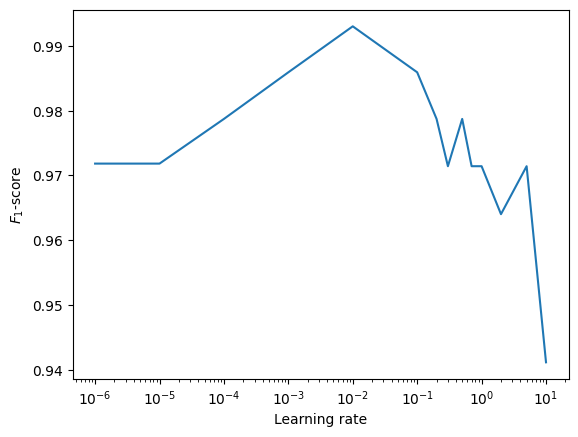

In [147]:
f1s = []
for lr in lrs:
    clf = LogisticRegression(lr=lr, max_iter=1e4)
    clf.fit(X_train_normalized, Y_train)
    f1s.append(f1_score(Y_test, clf.predict(X_test_normalized)))
plt.xscale('log')
plt.plot(lrs, f1s)
plt.xlabel('Learning rate')
plt.ylabel('$F_1$-score')

Рассмотрите несколько моделей, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

*Наличие регуляризации однозначно влияет на качество модели, наибольший $F_1$-score достигается при коэффициенте регуляризации около $10^{-1}$*

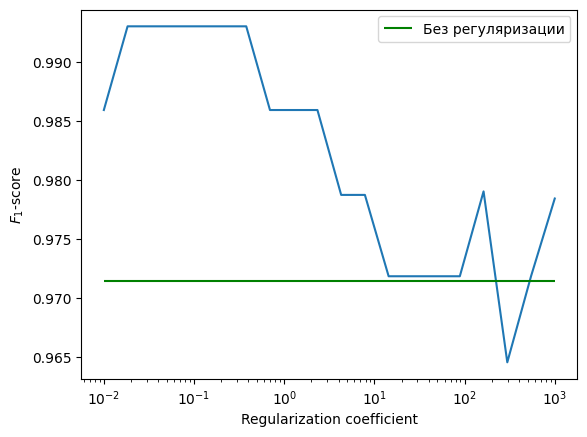

In [149]:
f1s = []
coefs = np.logspace(-2, 3, num=20, base=10) 
for coef in coefs:
    clf = LogisticRegression(alpha=coef, lr=1e-2, max_iter=1e4)
    clf.fit(X_train_normalized, Y_train)
    f1s.append(f1_score(Y_test, clf.predict(X_test_normalized)))
plt.xscale('log')
plt.plot(coefs, f1s)
clf = LogisticRegression(alpha=0, max_iter=1e4)
clf.fit(X_train_normalized, Y_train)
plt.hlines(f1_score(Y_test, clf.predict(X_test_normalized)), coefs[0], coefs[-1], color='green', label='Без регуляризации')
plt.xlabel('Regularization coefficient')
plt.ylabel('$F_1$-score')
plt.legend()

Выберите наилучшее значение коэффициента регуляризации с помощью кросс-валидации для двух подходов &mdash; `KFold` и `ShuffleSplit`. Используйте пять фолдов/разбиений.

Best regularization coefficient: 0.06951927961775606


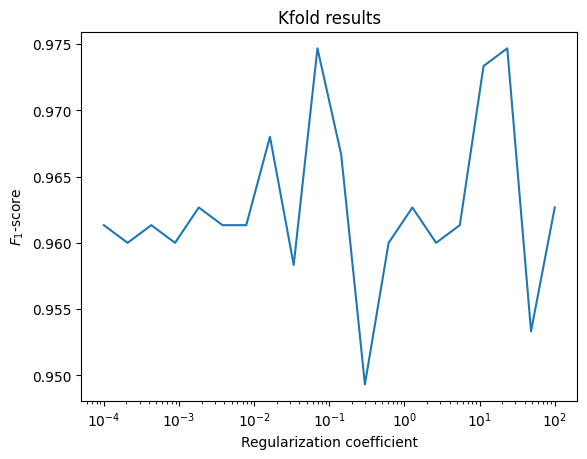

In [244]:
f1s = []
coefs = np.logspace(-4, 2, num=20, base=10) 
for coef in coefs:
    clf = LogisticRegression(alpha=coef, lr=1e-2, max_iter=1e4)
    f1s.append(cross_val_score(estimator=clf, X=X_test_normalized, y=Y_test, cv=KFold(n_splits=50, shuffle=True), scoring='f1_macro', n_jobs=-1).mean())
best_kfold = coefs[np.argmax(f1s)]
plt.xscale('log')
plt.plot(coefs, f1s)
plt.title('Kfold results')
plt.xlabel('Regularization coefficient')
plt.ylabel('$F_1$-score')
print('Best regularization coefficient:', best_kfold)
plt.show()

Best regularization coefficient: 0.00042813323987193956


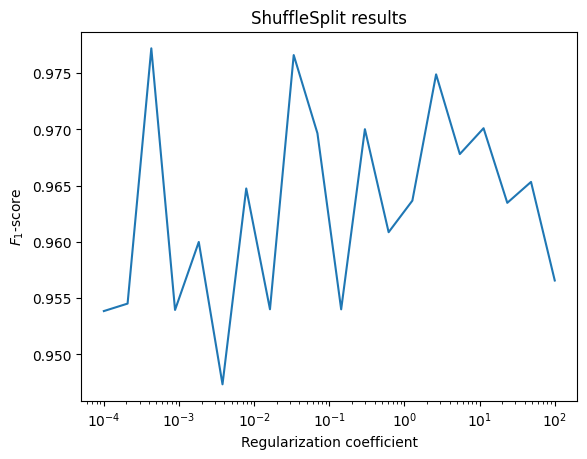

In [245]:
f1s = []
coefs = np.logspace(-4, 2, num=20, base=10) 
for coef in coefs:
    clf = LogisticRegression(alpha=coef, lr=1e-2, max_iter=1e4)
    f1s.append(cross_val_score(estimator=clf, X=X_test_normalized, y=Y_test, cv=ShuffleSplit(n_splits=50), scoring='f1_macro', n_jobs=-1).mean())
best_shufflesplit = coefs[np.argmax(f1s)]
plt.xscale('log')
plt.plot(coefs, f1s)
plt.title('ShuffleSplit results')
plt.xlabel('Regularization coefficient')
plt.ylabel('$F_1$-score')
print('Best regularization coefficient:', best_shufflesplit)
plt.show()

Для выбранного значения коэффициента регуляризации оцените дисперсию усредненного значения метрики качества на тестовых батчах. Для этого выполните кросс-валидацию достаточно много раз (не менее 100) и посчитайте выборочную дисперсию. Обратите внимание, что для стратегии `KFold` нужно на каждой итерации перемешивать данные, для этого можно указать `shuffle=True`.

Сравните эти две стратегии кросс-валидации. Какие их преимущества и недостатки?

In [ ]:
kfold = np.array([])
shufflesplit = np.array([])
for i in range(100):
    clf1 = LogisticRegression(alpha=best_kfold, lr=1e-2, max_iter=1e4)
    clf2 = LogisticRegression(alpha=best_shufflesplit, lr=1e-2, max_iter=1e4)
    kfold = np.append(kfold, cross_val_score(estimator=clf1, X=X_test_normalized, y=Y_test, cv=KFold(n_splits=5), scoring='f1_macro', n_jobs=-1).mean())
    shufflesplit =np.append(shufflesplit, cross_val_score(estimator=clf2, X=X_test_normalized, y=Y_test, cv=ShuffleSplit(n_splits=5), scoring='f1_macro', n_jobs=-1).mean())

In [243]:
print('Выборочная дисперсия KFold:',"{:10.6f}".format(kfold.std() ** 2))
print('Выборочная дисперсия ShuffleSplit:',"{:10.6f}".format(shufflesplit.std() ** 2))

Выборочная дисперсия KFold:   0.000012
Выборочная дисперсия ShuffleSplit:   0.000818


**Вывод:** *У KFold дисперсия значительно меньше. Это может быть связано с тем, что KFold разбивает данные на фиксированное количество блоков, в то время как ShuffleSplit случайным образом выбирает наборы данных для обучения и тестирования на каждой итерации. В результате KFold может давать более стабильные результаты, поскольку каждый блок данных используется как для обучения, так и для тестирования. В то же время ShuffleSplit может давать более разнообразные результаты, что приводит к более высокой выборочной дисперсии*